# Subscription Prediction


This data set contains records relevant to a direct marketing campaign of a Portuguese banking institution.The marketing
campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either
decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no)
to the term deposit (variable y).

# Introduction

Term deposits are cash investment held at a financial institution and are a major source of revenue for banks making them
important for financial institutions to market. Telemarketing remains to be a popular marketing technique because of  the 
potential effectiveness of human-to-human contact provided by a telephone call, which is sometimes quite the opposite  of 
many impersonal and robotic marketing messagesrelayed through social and digital media.  However,  executing such  direct
marketing effort usually requires a huge investment by the business as large callcenters need to be contracted to contact 
clients directly.

Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired',
        'self-employed','services','student','technician','unemployed','unknown')
    
3 - marital : marital status (categorical: 'divorced','married','single','unknown'
                              
4 - education: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
             'university.degree','unknown')
                              
5 - default: has credit in default? (categorical: 'no','yes','unknown')
                              
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
                              
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
                              related with the last contact of the current campaign:
                              
8 - contact: contact communication type (categorical: 'cellular','telephone')
                              
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
                              
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

                              
                              
other attributes:
11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
                              
12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
                              
13 - previous: number of contacts performed before this campaign and for this client (numeric)
                              
14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
                              
                              
                              

social and economic context attributes:
                              
                              
15 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
                              
16 - cons.price.idx: consumer price index - monthly indicator (numeric)
                              
17 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
                              
18 - euribor3m: euribor 3 month rate - daily indicator (numeric)
                              
19 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

20 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Reading the dataset

In [1]:
import pandas as pd
td=pd.read_csv(r"C:\Users\PRANAV\Videos\bank-direct-marketing-campaigns.csv")


In [2]:
td.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# observing shape of Dataframe

print(td.shape)

(41188, 20)


In [4]:
# As it is observed we have 41188 rows and 20 columns
# The first 19 columns represent the features and the last column represent the target/label(y).

In [5]:
# for complete information of the data


td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
td.isnull().sum()              # There is no nulls present in dataset

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# As could be seen we have some columns object type so we need to convert them to int and float

# Datacleaninng

In [8]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [9]:
td.job.unique()      # finding unique entries in job column


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [10]:
td.job.value_counts()  # finding frequency of unique entries coming  in column 'job'

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [11]:
td.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
td.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [33]:
td.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [34]:
td.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [37]:
td.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [36]:
td.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [35]:
td.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [38]:
td.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [4]:
td.drop(['contact','month','day_of_week'],axis=1,inplace=True)       # Dropping 'contact','month' and 'day_of_week' column

In [5]:
td.job.replace({'housemaid':3, 'services':8, 'admin.':10, 'blue-collar':9, 'technician':7,
       'retired':11, 'management':6, 'unemployed':1, 'self-employed':4, 'unknown':0,
       'entrepreneur':5, 'student':2},inplace=True)
td.marital.replace({'married':3, 'single':1, 'divorced':2, 'unknown':0},inplace=True)
td.education.replace({'basic.4y':3, 'high.school':6, 'basic.6y':4, 'basic.9y':5,
       'professional.course':7, 'unknown':0, 'university.degree':8,
       'illiterate':1},inplace=True)
td.default.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.housing.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.loan.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.poutcome.replace({'nonexistent':1, 'failure':0, 'success':2},inplace=True)
td.y.replace({'yes':1,'no':0},inplace=True)

In [6]:
td.info()                # checking if all columns are non null and int datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
dtypes: float64(5), int64(12)
memory

In [16]:
# Datacleaning is done

# Sampling

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train,test=train_test_split(td,test_size=0.2)     # Random sampling (dividing data into train and test in ratio 80:20)
                                                  # 80% data in train and 20% data in test

In [19]:
# Checking if the data is being divided into 80:20 ratio or not

In [20]:
td.shape

(41188, 17)

In [21]:
 # So in train--------> 80% of 41188 will come that is 
print((80/100)*41188)

32950.4


In [22]:
# And in test --------> 20% of 41188 will come that is
print((20/100)*41188)

8237.6


In [95]:
train.shape

(32950, 17)

In [96]:
test.shape

(8238, 17)

In [9]:
train_x=train.iloc[0::,0:-1]          # dividing train into train_x and train_y
train_y=train.iloc[0::,-1]

In [78]:
train_x                                # contains all x variables in train excluding the target variable

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
8416,40,10,1,8,0,2,1,2,999,0,1,1.4,94.465,-41.8,4.864,5228.1
28014,43,8,2,6,0,2,1,1,999,1,0,-1.8,93.075,-47.1,1.483,5099.1
10828,26,9,1,0,1,2,2,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1
6224,59,5,3,8,0,2,1,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
39491,58,1,3,5,1,2,1,1,6,1,2,-1.8,93.749,-34.6,0.644,5008.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,33,10,3,8,1,1,2,1,999,0,1,-1.8,92.893,-46.2,1.299,5099.1
10564,34,10,3,8,1,2,2,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
36863,46,10,1,8,1,1,1,1,999,0,1,-2.9,92.963,-40.8,1.252,5076.2
11013,24,7,1,7,1,2,1,2,999,0,1,1.4,94.465,-41.8,4.962,5228.1


In [79]:
train_y                             # contains the target variable in train data

8416     0
28014    0
10828    0
6224     0
39491    1
        ..
32958    0
10564    0
36863    0
11013    0
24830    0
Name: y, Length: 32950, dtype: int64

In [10]:
test_x=test.iloc[0::,0:-1]          # dividing test into test_x and test_y
test_y=test.iloc[0::,-1]

In [98]:
test_x                                # contains all x variables in test excluding the target variable

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
22681,40,7,1,8,1,1,2,7,999,0,1,1.4,93.444,-36.1,4.964,5228.1
26583,39,10,3,6,1,2,1,1,999,0,1,-0.1,93.200,-42.0,4.076,5195.8
40823,33,7,1,7,1,2,1,1,999,0,1,-1.1,94.199,-37.5,0.879,4963.6
29717,38,4,3,8,0,2,1,3,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
35116,54,9,3,3,1,2,2,1,999,1,0,-1.8,92.893,-46.2,1.250,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,27,7,1,7,1,2,1,2,999,0,1,1.4,93.918,-42.7,4.961,5228.1
35318,30,7,3,5,1,2,1,2,999,0,1,-1.8,92.893,-46.2,1.250,5099.1
13775,22,9,1,5,1,2,2,10,999,0,1,1.4,93.918,-42.7,4.963,5228.1
41149,30,10,1,8,1,2,1,2,999,0,1,-1.1,94.767,-50.8,1.039,4963.6


In [99]:
test_y                              #  contains the target variable in test data

22681    0
26583    0
40823    1
29717    0
35116    0
        ..
14446    0
35318    0
13775    0
41149    0
16724    0
Name: y, Length: 8238, dtype: int64

# Building logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [26]:
logreg.fit(train_x,train_y)            # fitting(building) model on train data

LogisticRegression()

In [27]:
pred_train=logreg.predict(train_x)                # predicting on train data

In [28]:
pred_test=logreg.predict(test_x)                  # predicting on test data

# Evaluating the model

FOR EVALUATING LOGISTIC REGRESSION MOST IMPORTANT IS CONFUSION MATRIX


FROM CONFUSION MATRIX WE GET----------->

1> Tpr/recall_score(True positive ratio) 

2> Fpr(False positive ratio)

3> Accuracy

4> AUROC

5> F1 Ratio

In [29]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,accuracy_score,roc_auc_score,roc_curve,precision_score

FOR TRAIN DATA

In [41]:
tab1=confusion_matrix(train_y,pred_train)

In [42]:
tab1

array([[28966,   312],
       [ 2970,   702]], dtype=int64)

In [43]:
f1_score(train_y,pred_train)

0.2996158770806658

In [44]:
recall_score(train_y,pred_train)

0.19117647058823528

In [45]:
accuracy_score(train_y,pred_train)

0.9003945371775417

In [46]:
Fpr=tab1[0][1]/(tab1[0][0]+tab1[0][1])
Fpr


0.010656465605574152

FOR TEST DATA

In [30]:
tab1=confusion_matrix(test_y,pred_test)

In [31]:
tab1

array([[7200,   70],
       [ 785,  183]], dtype=int64)

In [32]:
accuracy=accuracy_score(test_y,pred_test)*100
accuracy

89.62126729788784

In [33]:
Fpr=tab1[0][1]/(tab1[0][0]+tab1[0][1])
Fpr


0.009628610729023384

In [34]:
Tpr=recall_score(test_y,pred_test)*100
Tpr

18.90495867768595

In [35]:
precision=precision_score(test_y,pred_test)*100
precision

72.33201581027669

In [36]:
f1_ration=f1_score(test_y,pred_test)*100
f1_ration

29.975429975429975

In [37]:
pred_prob=logreg.predict_proba(test_x)

In [38]:
pred_prob

array([[0.96955614, 0.03044386],
       [0.94157345, 0.05842655],
       [0.93903859, 0.06096141],
       ...,
       [0.94566986, 0.05433014],
       [0.95676162, 0.04323838],
       [0.94885244, 0.05114756]])

In [235]:
df=pd.DataFrame(pred_prob)

In [236]:
df.rename(columns=({df.columns[0]:'pred0',df.columns[1]:'pred1'}),inplace=True)

In [237]:
df

,pred0,pred1
0,0.879683,0.120317
1,0.292232,0.707768
2,0.937474,0.062526
3,0.861825,0.138175
4,0.968767,0.031233
...,...,...
8233,0.957893,0.042107
8234,0.963179,0.036821
8235,0.953334,0.046666
8236,0.959166,0.040834


In [238]:
roc_auc_score(test_y,pred_prob[:,1])

0.7754111509468653

In [239]:
fpr,tpr,thre=roc_curve(test_y,pred_prob[:,1])

In [240]:
import matplotlib.pyplot as plt

Text(0.1, 0.8, 'area is 0.77 ')

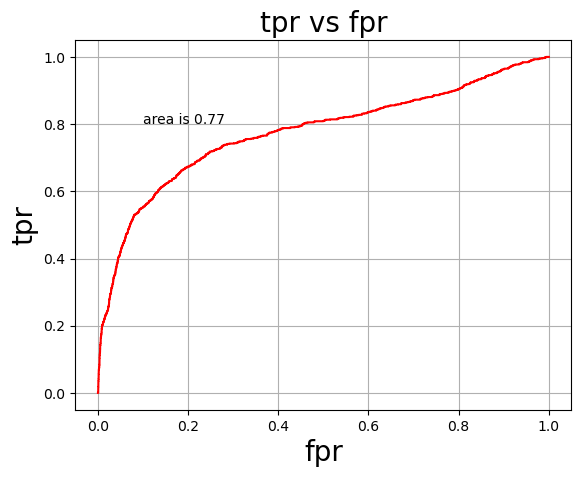

In [242]:
plt.plot(fpr,tpr,color='red')
plt.xlabel("fpr",size=20)
plt.ylabel("tpr",size=20)
plt.grid()
plt.title("tpr vs fpr",size=20)
plt.text(x=0.1,y=0.8,s="area is 0.77 ")

WE KNOW THAT WE WANT OUR MODEL TO HAVE

--------> HIGH ACCURACY

--------> HIGH Tpr

--------> LOW Fpr

--------> HIGH PRECISION

--------> HIGH F1 RATION

BUT HERE EVEN THOUGH OUR ACCURACY,PRECISION AND Fpr ARE COMING GOOD

OUR Tpr AND F1 RATION ARE NOT COMING GOOD

WHICH IMPLIES THAT OUR MODEL IS WORKING GOOD FOR CLASS(n)/CLASS 0 BUT NOT FOR CLASS(p)/CLASS 1

BUT WE WANT OUR MODEL TO BE WORKING GOOD FOR BOTH THE CLASSES CLASS 1 AS WELL AS CLASS 0

# Class Imbalance

In [47]:
td.y.value_counts()                 # 0-----> means 'no'
                                    # 1-----> means 'yes'

0    36548
1     4640
Name: y, dtype: int64

In [48]:
import seaborn as sns

<Axes: xlabel='y', ylabel='count'>

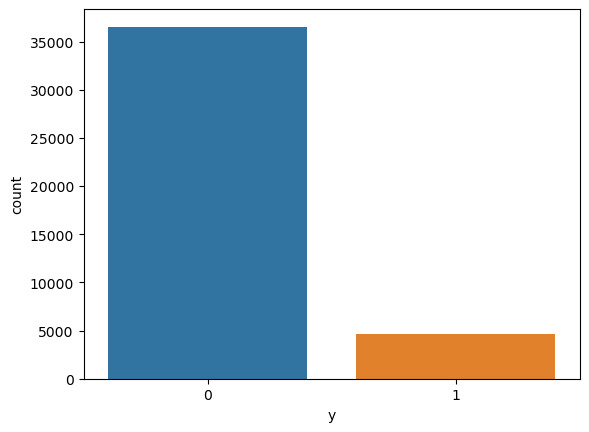

In [49]:
sns.countplot(x='y',data=td)

In [39]:
# As could be seen 'yes' are very less as compared to 'no' 

# Oversampling

OVERSAMPLING--------------> INCREASING THE NUMBER RECORDS OF THOSE CLASS WHICH HAS UNDER REPRESENTATION THAT IS CLASS 1

OVERSAMPLING IS ALWAYS PERFORMED ON TRAIN DATA

In [50]:
import pandas as pd
td=pd.read_csv(r"C:\Users\PRANAV\Videos\bank-direct-marketing-campaigns.csv")

In [51]:
td.drop(['contact','month','day_of_week'],axis=1,inplace=True)       # Dropping 'contact','month' and 'day_of_week' column

In [52]:
td.job.replace({'housemaid':3, 'services':8, 'admin.':10, 'blue-collar':9, 'technician':7,
       'retired':11, 'management':6, 'unemployed':1, 'self-employed':4, 'unknown':0,
       'entrepreneur':5, 'student':2},inplace=True)
td.marital.replace({'married':3, 'single':1, 'divorced':2, 'unknown':0},inplace=True)
td.education.replace({'basic.4y':3, 'high.school':6, 'basic.6y':4, 'basic.9y':5,
       'professional.course':7, 'unknown':0, 'university.degree':8,
       'illiterate':1},inplace=True)
td.default.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.housing.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.loan.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.poutcome.replace({'nonexistent':1, 'failure':0, 'success':2},inplace=True)
td.y.replace({'yes':1,'no':0},inplace=True)

In [53]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
dtypes: float64(5), int64(12)
memory

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_o,test_o=train_test_split(td,test_size=0.2)

In [78]:
dum_df = train_o[train_o.y == 1]
train_o = pd.concat([train_o, dum_df])
train_o 

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24870,43,5,3,5,1,2,2,1,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
8687,36,5,3,8,1,2,2,1,999,0,1,1.4,94.465,-41.8,4.864,5228.1,0
12762,48,9,3,4,0,2,1,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3751,37,6,3,8,1,1,1,4,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0
3551,40,8,2,6,1,1,1,1,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36362,34,7,3,8,1,2,1,1,999,0,1,-2.9,92.963,-40.8,1.262,5076.2,1
39051,64,11,3,6,1,2,1,1,999,0,1,-3.0,92.713,-33.0,0.715,5023.5,1
14788,45,0,0,0,1,2,2,1,999,0,1,1.4,93.918,-42.7,4.957,5228.1,1
38690,26,10,1,6,1,0,0,1,999,0,1,-3.4,92.649,-30.1,0.715,5017.5,1


In [79]:
train_x=train_o.iloc[0::,0:-1]          # dividing train into train_x and train_y
train_y=train_o.iloc[0::,-1]

In [80]:
test_x=test_o.iloc[0::,0:-1]          # dividing train into train_x and train_y
test_y=test_o.iloc[0::,-1]

In [81]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [82]:
logreg.fit(train_x,train_y)   

C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
pred_test=logreg.predict(test_x)   

In [84]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,accuracy_score,roc_auc_score,roc_curve,precision_score

In [85]:
tab=confusion_matrix(test_y,pred_test)
tab

array([[6736,  568],
       [ 466,  468]], dtype=int64)

In [86]:
Fpr=tab[0][1]/(tab[0][0]+tab[0][1])
Fpr

0.07776560788608981

In [87]:
recall_score(test_y,pred_test)*100

50.107066381156315

In [88]:
accuracy_score(test_y,pred_test)*100

87.44840980820587

In [89]:
f1_score(test_y,pred_test)*100

47.51269035532995

In [90]:
precision_score(test_y,pred_test)*100

45.173745173745175

In [91]:
pred_prob=logreg.predict_proba(test_x)

In [92]:
pred_prob

array([[0.82550855, 0.17449145],
       [0.60200556, 0.39799444],
       [0.81481465, 0.18518535],
       ...,
       [0.87192196, 0.12807804],
       [0.88146113, 0.11853887],
       [0.60941755, 0.39058245]])

In [71]:
df=pd.DataFrame(pred_prob)

In [72]:
df.rename(columns=({df.columns[0]:'pred0',df.columns[1]:'pred1'}),inplace=True)

In [73]:
df

,pred0,pred1
0,0.899632,0.100368
1,0.774146,0.225854
2,0.910965,0.089035
3,0.743825,0.256175
4,0.789013,0.210987
...,...,...
8233,0.422497,0.577503
8234,0.922741,0.077259
8235,0.924670,0.075330
8236,0.933294,0.066706


In [74]:
roc_auc_score(test_y,pred_prob[:,1])

0.761285359463941

In [75]:
fpr,tpr,thre=roc_curve(test_y,pred_prob[:,1])

In [76]:
import matplotlib.pyplot as plt

Text(0.1, 0.8, 'area is 0.74')

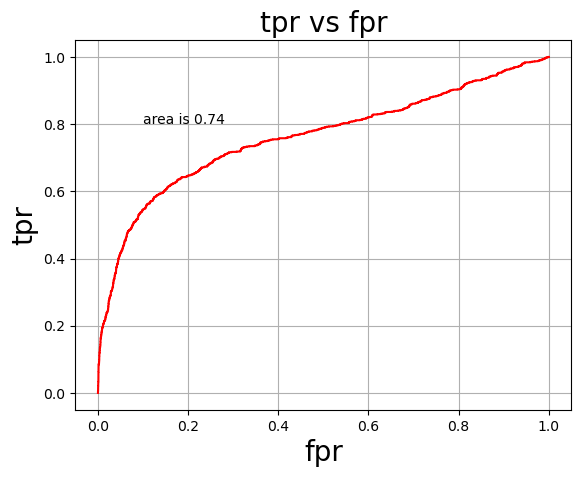

In [77]:
plt.plot(fpr,tpr,color='red')
plt.xlabel("fpr",size=20)
plt.ylabel("tpr",size=20)
plt.grid()
plt.title("tpr vs fpr",size=20)
plt.text(x=0.1,y=0.8,s="area is 0.74")

SO AFTER OVERSAMPLING OUR VALUES HAVE CHANGED LIKEWISE


1> ACCURACY  87 %

2> Fpr  0.07

3> Tpr HAS INCREASED TO 50 FROM 18

4> F1 RATION HAS INCREASED TO 47 FROM 29

5> Precision 45

# TARGETTING THOSE CUSTOMERS WHO CAN SUBSCRIBE TO THE TERM DEPOSIT

In [320]:
pred_prob_full=logreg.predict_proba(td.iloc[0::,0:-1])

In [321]:
pred_prob_full

array([[0.80765244, 0.19234756],
       [0.80965654, 0.19034346],
       [0.81221123, 0.18778877],
       ...,
       [0.40556202, 0.59443798],
       [0.40920015, 0.59079985],
       [0.41370254, 0.58629746]])

In [322]:
pred_prob_full=pd.DataFrame(pred_prob_full)

In [325]:
pred_prob_full.rename(columns=({pred_prob_full.columns[0]:'pred0',pred_prob_full.columns[1]:'pred1'}),inplace=True)

In [326]:
pred_prob_full

,pred0,pred1
0,0.807652,0.192348
1,0.809657,0.190343
2,0.812211,0.187789
3,0.823825,0.176175
4,0.802940,0.197060
...,...,...
41183,0.397834,0.602166
41184,0.413626,0.586374
41185,0.405562,0.594438
41186,0.409200,0.590800


In [327]:
pred_prob_full=pred_prob_full.sort_values('pred1',ascending=False)

In [328]:
pred_prob_full

,pred0,pred1
38238,0.068678,0.931322
38230,0.069943,0.930057
38153,0.071130,0.928870
38512,0.071468,0.928532
38804,0.071838,0.928162
...,...,...
16281,0.897881,0.102119
17606,0.899188,0.100812
16349,0.902874,0.097126
17745,0.904142,0.095858


In [330]:
pred_prob_full[pred_prob_full.pred1>0.90]                             # SELECTING ONLY THOSE CUSTOMERS HAVING PROBABILITY 
                                                                      # MORE THAN 90% OF SUBSCRIPTION 
                                                                       

,pred0,pred1
38238,0.068678,0.931322
38230,0.069943,0.930057
38153,0.071130,0.928870
38512,0.071468,0.928532
38804,0.071838,0.928162
...,...,...
40686,0.099870,0.900130
39071,0.099892,0.900108
39227,0.099933,0.900067
39392,0.099940,0.900060


# DECISION TREE

TRYING DECISION TREE MODEL

In [1]:
import pandas as pd
td=pd.read_csv(r"C:\Users\PRANAV\Videos\bank-direct-marketing-campaigns.csv")

In [2]:
td.drop(['contact','month','day_of_week'],axis=1,inplace=True)       # Dropping 'contact','month' and 'day_of_week' column

In [3]:
td.job.replace({'housemaid':3, 'services':8, 'admin.':10, 'blue-collar':9, 'technician':7,
       'retired':11, 'management':6, 'unemployed':1, 'self-employed':4, 'unknown':0,
       'entrepreneur':5, 'student':2},inplace=True)
td.marital.replace({'married':3, 'single':1, 'divorced':2, 'unknown':0},inplace=True)
td.education.replace({'basic.4y':3, 'high.school':6, 'basic.6y':4, 'basic.9y':5,
       'professional.course':7, 'unknown':0, 'university.degree':8,
       'illiterate':1},inplace=True)
td.default.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.housing.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.loan.replace({'no':1, 'unknown':0, 'yes':2},inplace=True)
td.poutcome.replace({'nonexistent':1, 'failure':0, 'success':2},inplace=True)
td.y.replace({'yes':1,'no':0},inplace=True)

In [4]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
dtypes: float64(5), int64(12)
memory

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train,test=train_test_split(td,test_size=0.2)

In [7]:
train_x=train.iloc[0::,0:-1]
train_y=train.iloc[0::,-1]

In [8]:
test_x=test.iloc[0::,0:-1]
test_y=test.iloc[0::,-1]

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [10]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [11]:
pred_train=dt.predict(train_x)

In [12]:
pred_test=dt.predict(test_x)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve

In [14]:
tab=confusion_matrix(test_y,pred_test)

In [15]:
tab

array([[6604,  704],
       [ 630,  300]], dtype=int64)

In [16]:
accuracy_score(test_y,pred_test)

0.8380674921097354

In [17]:
recall_score(test_y,pred_test)*100

32.25806451612903

In [18]:
Fpr=tab[0][1]/(tab[0][1]+tab[0][0])
Fpr

0.0963327859879584

In [19]:
precision_score(test_y,pred_test)*100

29.880478087649404

In [20]:
f1_score(test_y,pred_test)*100

31.023784901758013

# FEATURE SELECTION 

WE WANT TO BUILD OUR MODEL ON AS MANY LESS FEATURES AS POSSIBLE
    
    
BECAUSE MORE NUMBER OF FEATURES MEANS MORE CONFUSION TO INTERPRET       

In [21]:
feat_imp=dt.feature_importances_
feat_imp

array([0.19595447, 0.09266991, 0.04035065, 0.08404634, 0.0200727 ,
       0.04675555, 0.02518741, 0.09135105, 0.01329025, 0.01732097,
       0.03510824, 0.0038738 , 0.00966037, 0.02439541, 0.13845974,
       0.16150314])

there is one on one mapping between your features(columns) and values in feature_importance

all vales are within 0 to 1

HIGHER VALUE OF FEATURE_IMPORTANCE MORE SIGNIFICANT IS THE COLUMN

In [22]:
len(feat_imp)

16

In [23]:
df= pd.DataFrame()
df['Feat'] = train_x.columns
df['imp'] = dt.feature_importances_
df = df.sort_values('imp', ascending = False)
df

,Feat,imp
0,age,0.195954
15,nr.employed,0.161503
14,euribor3m,0.138460
1,job,0.092670
7,campaign,0.091351
3,education,0.084046
5,housing,0.046756
2,marital,0.040351
10,poutcome,0.035108
6,loan,0.025187


AGE IS MOST SIGNIFICANT COLUMN

 TOP 6 SIGNIFICANT COLUMNS--------> age , nr.employed , euribor3m , campaign , job , education 

# TO CHECK WHICH AGE GROUP IS MORE LIKELY TO SUBSCRIBE TO TERM DEPOSIT

In [14]:
import seaborn as sns

In [11]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

In [12]:
td['age'] = pd.cut(td['age'], bins=age_bins, labels=age_labels, right=False)

<Axes: xlabel='age', ylabel='count'>

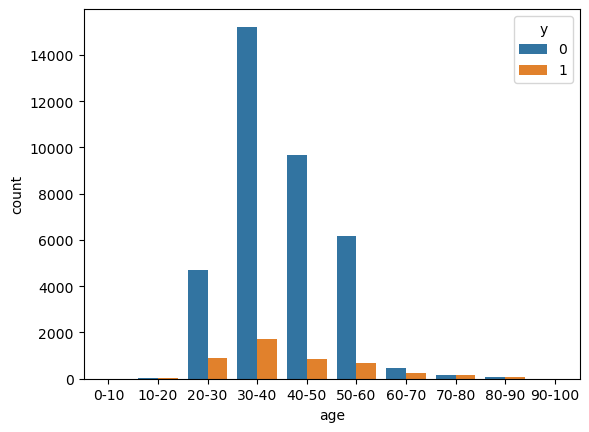

In [15]:
sns.countplot(x='age',hue='y',data=td)

THEREFORE AGE GROUP 30-40 IS MORE LIKELY TO SUBSCRIBE TO TERM DEPOSIT

# WHICH JOB PROFILE IS MORE LIKELY TO SUBSCRIBE 

<Axes: xlabel='job', ylabel='count'>

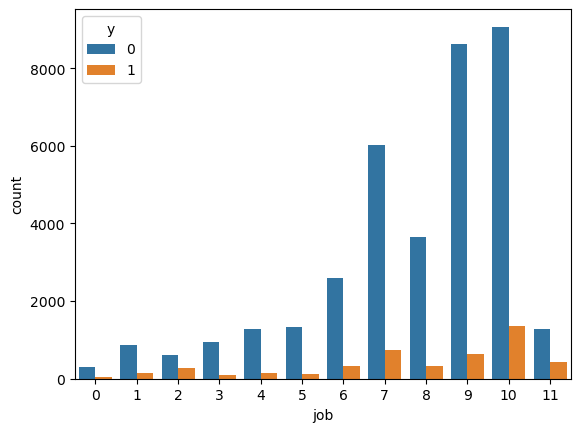

In [17]:
sns.countplot(x='job',hue='y',data=td)

SO CLIENTS OF JOB PROFILE IN FOLLOWING ORDER ARE MORE LIKELY TO SUBSCRIBE

1> FIRST ADMIN

2> SECOND TECHNICIAN

3> BLUE COLLAR

4> RETIRED

# EDUCATIONAL  ANALYSIS ON SUBSCRIPTION

<Axes: xlabel='education', ylabel='count'>

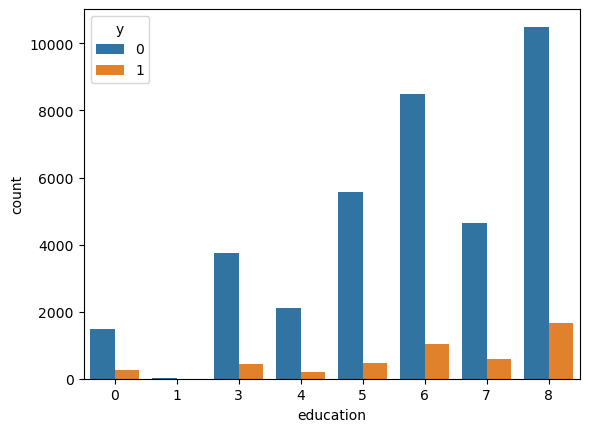

In [18]:
sns.countplot(x='education',hue='y',data=td)

SO CLIENTS HOLDING UNIVERSITY DEGREE ARE MORE LIKELY TO SUBSCRIBE TO TERM DEPOSIT 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train,test=train_test_split(td,test_size=0.2)

In [23]:
train_x=train.iloc[0::,[0,15,14,1,7,3]]
train_x

,age,nr.employed,euribor3m,job,campaign,education
22401,31,5228.1,4.964,7,2,8
36263,27,5076.2,1.266,10,1,8
18164,34,5228.1,4.963,4,1,8
33329,39,5099.1,1.291,7,1,7
14767,34,5228.1,4.957,7,1,7
...,...,...,...,...,...,...
34029,41,5099.1,1.281,8,2,6
33260,34,5099.1,1.291,4,1,8
27568,47,5195.8,4.021,10,5,6
14568,35,5228.1,4.961,9,1,5


In [24]:
train_y=train.iloc[0::,-1]
train_y

22401    1
36263    0
18164    0
33329    0
14767    0
        ..
34029    0
33260    0
27568    0
14568    0
11169    0
Name: y, Length: 32950, dtype: int64

In [25]:
test_x=test.iloc[0::,[0,15,14,1,7,3]]
test_x

,age,nr.employed,euribor3m,job,campaign,education
33085,32,5099.1,1.291,8,6,6
12035,39,5228.1,4.955,4,4,7
20749,34,5228.1,4.965,5,1,0
4937,36,5191.0,4.858,8,2,4
3066,29,5191.0,4.859,10,2,8
...,...,...,...,...,...,...
16270,35,5228.1,4.961,7,2,7
39249,33,5008.7,0.650,10,1,8
21411,31,5228.1,4.963,10,1,8
16578,34,5228.1,4.963,9,3,5


In [26]:
test_y=test.iloc[0::,-1]
test_y

33085    0
12035    0
20749    0
4937     0
3066     0
        ..
16270    0
39249    0
21411    0
16578    0
14810    0
Name: y, Length: 8238, dtype: int64

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [28]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [29]:
pred_test=dt.predict(test_x)

In [30]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score

In [31]:
confusion_matrix(test_y,pred_test)

array([[6744,  580],
       [ 632,  282]], dtype=int64)

In [32]:
accuracy_score(test_y,pred_test)

0.8528769118718136

In [33]:
precision_score(test_y,pred_test)

0.3271461716937355

In [34]:
recall_score(test_y,pred_test)

0.3085339168490153

In [35]:
f1_score(test_y,pred_test)

0.3175675675675676

In [36]:
Fpr=tab[0][1]/(tab[0][1]+tab[0][0])
Fpr

0.0963327859879584

AS WE ARE GETTING GOOD RESULTS WITH LESS NUMBER OF FEATURES(COLUMNS) SO WE WILL BE USING 6 FEATURES ONLY

AS WE KNOW WE DONT NEED TO TAKE INSIGNIFICANT COLUMNS

TAKING 16 COLUMNS WE GOT                                                  

                                                

ACCURACY-----------> 83% 
                                      
                                                                         
Tpr----------------> 33


Fpr----------------> 0.1  


PRECISION----------> 27%


F1 RATION----------> 30                                                    








 TAKING 6 COLUMNS WE GOT

                                                

ACCURACY-----------> 83%  


                                                                         
Tpr----------------> 29 



Fpr----------------> 0.06  



PRECISION----------> 30%  



F1 RATION----------> 32                                                  



# CLASS IMBALANCE


TRYING OVERSAMPLING

In [285]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
dtypes: float64(5), int64(12)
memory

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train,test=train_test_split(td,test_size=0.2)

In [39]:
temp=train[train.y==1]
train=pd.concat([train,temp])

In [40]:
train_x=train.iloc[0::,[0,15,14,1,7,3]]
train_x

,age,nr.employed,euribor3m,job,campaign,education
34634,39,5099.1,1.266,5,2,5
39537,52,5008.7,0.654,10,2,0
4113,31,5191.0,4.858,9,6,5
8415,40,5228.1,4.864,9,4,5
653,39,5191.0,4.857,9,2,5
...,...,...,...,...,...,...
12433,31,5228.1,4.960,6,3,6
24073,50,5195.8,4.700,5,1,8
38503,63,5017.5,0.728,7,1,7
28400,33,5099.1,1.435,7,1,8


In [41]:
test_x=test.iloc[0::,[0,15,14,1,7,3]]
test_x

,age,nr.employed,euribor3m,job,campaign,education
40938,51,4963.6,0.982,3,2,3
24915,33,5195.8,4.153,5,4,8
11645,29,5228.1,4.959,10,4,8
284,42,5191.0,4.857,9,2,5
29417,42,5099.1,1.405,9,1,6
...,...,...,...,...,...,...
27535,37,5195.8,4.021,4,2,8
36931,37,5076.2,1.099,5,1,8
25697,38,5195.8,4.120,9,2,7
14762,31,5228.1,4.957,9,1,5


In [42]:
test_y=test.iloc[0::,-1]
test_y

40938    0
24915    0
11645    0
284      0
29417    0
        ..
27535    0
36931    0
25697    0
14762    0
21975    0
Name: y, Length: 8238, dtype: int64

In [43]:
train_y=train.iloc[0::,-1]
train_y

34634    0
39537    1
4113     0
8415     0
653      0
        ..
12433    1
24073    1
38503    1
28400    1
10049    1
Name: y, Length: 36657, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [45]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [46]:
pred_train=dt.predict(train_x)

In [47]:
pred_test=dt.predict(test_x)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve

In [49]:
tab=confusion_matrix(test_y,pred_test)
tab

array([[6543,  762],
       [ 621,  312]], dtype=int64)

In [50]:
accuracy_score(test_y,pred_test)

0.8321194464675892

In [51]:
recall_score(test_y,pred_test)*100

33.440514469453376

In [52]:
Fpr=tab[0][1]/(tab[0][1]+tab[0][0])
Fpr

0.10431211498973306

In [53]:
precision_score(test_y,pred_test)*100

29.05027932960894

In [54]:
f1_score(test_y,pred_test)*100

31.091180866965622

# HYPERPARAMETER TUNINIG

HYPERPARAMTER ----> THESE ARE THOSE PARAMETERS WHICH ARE NOT PART OF ORIGINAL DATA AND USER CAN CONTROL IT

FOR EX---> CRITERIA= 'GINI' AND 'ENTROPY , MIN SAMPLE SPLIT , MAX DEPTH


THERE CAN BE MANY COMBINATION OF THESE  PARAMETERS SO THROUGH HYPERPARAMETER TUNING WE ARE FINDING THE BEST COMBINATION


In [55]:
criteria = ['gini','entropy']
md = range(6,10)
mss = (25,50,75)
from sklearn.tree import DecisionTreeClassifier
d = {}
d['Criteria'] = []
d['max_depth'] = []
d['min_samples_split'] = []
d['Accuracy'] = []
for i in criteria:
    for j in md:
        for k in mss:
            d['Criteria'].append(i)
            d['max_depth'].append(j)
            d['min_samples_split'].append(k)
            dt = DecisionTreeClassifier(criterion= i , max_depth= j, min_samples_split= k)
            dt.fit(train_x, train_y)
            d['Accuracy'].append(accuracy_score(train_y, dt.predict(train_x)))
import pandas as pd
df_acc = pd.DataFrame(d)
df_acc = df_acc.sort_values('Accuracy', ascending = False)
df_acc.head(1)

,Criteria,max_depth,min_samples_split,Accuracy
21,entropy,9,25,0.852661


In [56]:
def hyp_tun(train_x, train_y, md, mss):
    criteria = ['gini','entropy']
    from sklearn.tree import DecisionTreeClassifier
    d = {}
    d['Criteria'] = []
    d['max_depth'] = []
    d['min_samples_split'] = []
    d['Accuracy'] = []
    for i in criteria:
        for j in md:
            for k in mss:
                d['Criteria'].append(i)
                d['max_depth'].append(j)
                d['min_samples_split'].append(k)
                dt = DecisionTreeClassifier(criterion= i , max_depth= j, min_samples_split= k)
                dt.fit(train_x, train_y)
                d['Accuracy'].append(accuracy_score(train_y, dt.predict(train_x)))
    import pandas as pd
    df_acc = pd.DataFrame(d)
    df_acc = df_acc.sort_values('Accuracy', ascending = False)
    print('best parameters for hyperparameter tunning are as follows:')
    return df_acc.head(1)

In [57]:
hyp_tun(train_x, train_y, md, mss)

best parameters for hyperparameter tunning are as follows:


,Criteria,max_depth,min_samples_split,Accuracy
21,entropy,9,25,0.852661


In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_split=25)

In [59]:
dt.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=9, min_samples_split=25)

In [60]:
pred_train=dt.predict(train_x)

In [61]:
pred_test=dt.predict(test_x)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve

In [63]:
tab=confusion_matrix(test_y,pred_test)
tab

array([[6855,  450],
       [ 544,  389]], dtype=int64)

In [64]:
accuracy_score(test_y,pred_test)

0.8793396455450352

In [65]:
recall_score(test_y,pred_test)*100

41.69346195069667

In [66]:
Fpr=tab[0][1]/(tab[0][1]+tab[0][0])
Fpr

0.061601642710472276

In [67]:
precision_score(test_y,pred_test)*100

46.36471990464839

In [68]:
f1_score(test_y,pred_test)*100

43.90519187358916

SO FAR WE HAVE GOT THE BEST MODEL FROM DECISION TREE AFTER DOING OVERFITTING AND HYPERPARAMETER TUNING WITH 

ACCURACY-----------> 88%

Tpr----------------> 43

Fpr----------------> 0.06

PRECISION----------> 49%

F1 RATION----------> 46



# RANDOM FOREST 

TRYING RANDOM FOREST

In [292]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
dtypes: float64(5), int64(12)
memory

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
train,test=train_test_split(td,test_size=0.2)

In [353]:
temp=train[train.y==1]
train=pd.concat([train,temp])

In [354]:
train_x=train.iloc[0::,[0,15,14,1,7,3]]
train_x

,age,nr.employed,euribor3m,job,campaign,education
28634,39,5099.1,1.410,6,1,8
30732,50,5099.1,1.344,9,1,3
4739,40,5191.0,4.858,9,1,5
21061,31,5228.1,4.964,10,1,6
21441,31,5228.1,4.963,7,1,7
...,...,...,...,...,...,...
39133,78,5008.7,0.655,11,1,7
3203,38,5191.0,4.860,8,3,6
16884,34,5228.1,4.962,9,2,4
38340,26,5017.5,0.739,10,1,8


In [355]:
test_y=test.iloc[0::,-1]
test_y

34116    0
23121    0
10307    0
1055     0
34965    0
        ..
20747    0
37345    1
12374    0
36826    0
20439    0
Name: y, Length: 8238, dtype: int64

In [356]:
test_x=test.iloc[0::,[0,15,14,1,7,3]]
test_x

,age,nr.employed,euribor3m,job,campaign,education
34116,33,5099.1,1.281,9,2,5
23121,40,5228.1,4.965,10,2,6
10307,53,5228.1,4.960,5,2,3
1055,35,5191.0,4.856,10,2,3
34965,43,5099.1,1.250,8,1,4
...,...,...,...,...,...,...
20747,57,5228.1,4.965,9,1,5
37345,30,5076.2,0.883,10,3,8
12374,51,5228.1,4.959,11,1,5
36826,41,5076.2,1.260,1,1,3


In [357]:
train_y=train.iloc[0::,-1]
train_y

28634    0
30732    1
4739     0
21061    0
21441    0
        ..
39133    1
3203     1
16884    1
38340    1
40542    1
Name: y, Length: 36639, dtype: int64

In [358]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [359]:
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [360]:
pred_train=rfc.predict(train_x)

In [361]:
pred_test=rfc.predict(test_x)

In [362]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,accuracy_score,precision_score

In [363]:
confusion_matrix(test_y,pred_test)

array([[6770,  517],
       [ 611,  340]], dtype=int64)

In [364]:
recall_score(test_y,pred_test)

0.35751840168243953

In [365]:
f1_score(test_y,pred_test)

0.37610619469026546

In [366]:
accuracy_score(test_y,pred_test)

0.8630735615440641

In [367]:
precision_score(test_y,pred_test)

0.396732788798133

# HYPERPARAMETER TUNING

In [368]:
from sklearn.model_selection import GridSearchCV

In [369]:
search_dict = {"criterion": ['gini','entropy'],
              "n_estimators": (50, 75, 100, 125, 150) }

In [370]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc_GridSearchCV = GridSearchCV(rfc, param_grid= search_dict) 

In [371]:
rfc_GridSearchCV.fit(train_x, train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': (50, 75, 100, 125, 150)})

In [339]:
rfc_GridSearchCV.best_params_

{'criterion': 'entropy', 'n_estimators': 150}

In [372]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion= 'gini', n_estimators= 150)

In [373]:
rfc.fit(train_x,train_y)

RandomForestClassifier(n_estimators=150)

In [374]:
pred_train=rfc.predict(train_x)

In [375]:
pred_test=rfc.predict(test_x)

In [376]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,accuracy_score,precision_score

In [377]:
confusion_matrix(test_y,pred_test)

array([[6767,  520],
       [ 608,  343]], dtype=int64)

In [378]:
recall_score(test_y,pred_test)

0.36067297581493163

In [379]:
f1_score(test_y,pred_test)

0.37816979051819183

In [380]:
accuracy_score(test_y,pred_test)

0.8630735615440641

In [381]:
precision_score(test_y,pred_test)

0.39745075318655854

# BEST MODEL WE HAVE GOT FROM DECISION TREE

SO  WE HAVE GOT THE BEST MODEL FROM DECISION TREE IN BETWEEN DECISION TREE , LOGISTIC REGRESSION AND RANDOM FOREST

WITH------------------->

ACCURACY-----------> 88%

Tpr----------------> 43

Fpr----------------> 0.06

PRECISION----------> 49%

F1 RATION----------> 46

# CONCLUSION

A> TO BUSINESS POINT OF VIEW A COMPANY CAN USE THIS DECISION TREE MODEL SO AS TO CHECK IF THE CLENT WILL 

   SUBCRIBE TO TERM DEPOSIT OR NOT.
    

B> SECONDLY, WHILE TARGETTING THE CLIENTS FOLLOWING POINTS NEED TO BE REMEMBERED

1> AGE GROUP 30-40 YEARS IS MORE LIKELY TO SUBSCRIBE TO TERM DEPOSIT 

2> JOB PROFILE IN FOLLOWING ORDER ARE MORE LIKELY TO SUBSCRIBE

a> FIRST ADMIN

b> SECOND TECHNICIAN

c> BLUE COLLAR

d> RETIRED

3> CLIENTS HOLDING UNIVERSITY DEGREE ARE MORE LIKELY TO SUBSCRIBE TO TERM DEPOSIT
